In [1]:
import numpy as np

In [3]:
# generate all possible combinations

def combinations_recursive(variables, total, step, current=None, results=None):
    if results is None:
        results = []  # Initialize results list
    if current is None:
        current = []  # Initialize current combination

    # Base case: If we've set all variables
    if variables == 1:
        if total >= 0:  # Ensure non-negative values
            current.append(round(total * step,step_decimal))  # Add the last value scaled back
            results.append(current.copy())  # Add combination to results
            current.pop()  # Backtrack
        return

    # Iterate over all possible values for the current variable
    for value in range(total + 1):
        current.append(round(value * step,step_decimal))  # Scale back to original step size
        combinations_recursive(variables - 1, total - value, step, current, results)
        current.pop()  # Backtrack

    return results

# set-up
step = 0.05 
step_decimal= len(str(step))
variables = 5
total = int(1 / step)  # Scale to integers

combinations = combinations_recursive(variables, total, step)
print(f"Number of combinations: {len(combinations)}")

Number of combinations: 10626


In [5]:
# empirical coefficients based on the study table order
# 0.1- 1 Mev
x=[[-2.7935912e+000, -4.8701419e-001, -1.0018701e-002, +8.8678884e-002, +1.0730137e-001, +2.9723216e-002, -2.8135774e-002, -2.7123969e-002,-7.1709694e-003, -5.4763185e-004],
   [-2.7475814e+000, -4.8282882e-001, -9.6171758e-003, +1.1509334e-001, +1.5868820e-001, +1.0512416e-001, +2.8185529e-002, -3.7285072e-003, -3.5087983e-003, -5.6602188e-004],
   [-2.7486244e+000, -4.8291833e-001, -2.2459194e-002, +5.3882857e-002, +4.1777637e-003, -1.0627109e-001, -1.4206426e-001, -8.3224818e-002, -2.3639515e-002, -2.6783362e-003],
   [-2.6425124e+000, -4.8257184e-001, -1.5750264e-002, +8.1966928e-002, +5.5603513e-002, -5.4305830e-002, -1.1165768e-001, -7.2597294e-002, -2.1578939e-002, -2.4870274e-003],
   [-2.6878951e+000, -4.8330754e-001, -1.7836087e-002, +9.5039764e-002, +1.2403649e-001, +6.9448458e-002, +8.5812457e-004, -1.7264627e-002, -7.5142626e-003, -1.0350043e-003]]

#[Hematite, Calcite, Quartz, Water, Cellulose]

In [133]:
x=[[+2.0498085e+001, -1.7595413e+001, -4.3336497e+001, -1.0085629e+001, +4.3422551e+000, -1.2113634e+000, -7.3382345e-001, +9.5425976e-001, +5.1237724e-001, +6.8229730e-002],
   [+2.6941534e+001, +3.8193137e+001, +1.4969305e+001, +1.5956344e+000, +1.4056246e+000, +1.2587229e+000, +3.2698683e-001, +1.5119510e-002, -2.7425826e-003, 0],
   [+2.6194138e+002, +4.3924014e+002, +2.4859748e+002, +3.5092578e+001, -1.8342760e+001, -1.0689711e+001, -4.5386931e+000, -1.7493307e+000, -3.8028718e-001, -3.2047899e-002],
   [-2.4230995e+000, -7.8956816e+000, -8.1084383e+000, +1.0969935e+000, +5.2765600e+000, +3.0993264e+000, +8.3202502e-001, +1.0872391e-001, +5.5992322e-003, +1.0000000e+000],
   [-6.6053865e+001, -1.2612990e+002, -9.2754833e+001, -2.4873314e+001, +4.8579203e+000, +5.1353721e+000, +1.4280615e+000, +1.8115460e-001, +8.9577904e-003, +4.5000000e-001]]
#[Hematite 0.0794-1 Mev , Calcite 0.063-1 Mev, Quartz 0.05-1 Mev, Water 0.01-1 Mev, Cellulose 0.01-1 Mev]

In [10]:

E_k= [0.22,0.33,0.506]#,0.0865,0.105,0.146] #Mev Emission lines

efficiency_ini= [0.03562,0.02487,0.01957]#,0.56,0.55,0.52]  #lists should have the same length
mass_attenuation_ini= [0.324,0.401,0.454]#,0.232,0.198,0.148]
density_thickness= 0.76*2.32 #cm* g/cm^3
A_ini= [40.38,43.37,51.58]  #should be obtainable with the spectrometer or use eq 7

sigma_efficiency_effec=[0.1,0.08,0.08]              #[0.1,0.08,0.08,0.08,0.08]  # check if these are lists of fixed values 
sigma_efficiency_ini= [0.1,0.2,0.21]                #[0.1,0.2,0.21,0.21,0.21]
sigma_A_ini=[0.25,0.25,0.25]                        #[0.25,0.25,0.25,0.25,0.25]

global_x_min=1e6 #huge arbitrary number to initialize global minimum value

for w in combinations: 
    mass_attenuation_effec=0
    for i in range(5): #5 based on the number of elements in each combination.
        inner_sum=0
        for j in range(10): #10 based on the number of empirical coefficient for each element
            inner_sum += x[i][j] * (np.log(E_k)**j)
        mass_attenuation_effec += w[i] * np.exp(inner_sum)
    
    efficiency_effec= efficiency_ini * np.exp(-(mass_attenuation_effec - mass_attenuation_ini)*density_thickness) 
    
    A_effec= (efficiency_ini/efficiency_effec)* A_ini
    
    sigma_A_effec=A_effec* np.sqrt((np.array(sigma_efficiency_effec)/np.array(efficiency_effec))**2
                                   +(np.array(sigma_efficiency_ini)/np.array(efficiency_ini))**2
                                   +(np.array(sigma_A_ini)/np.array(A_ini))**2)
    
    A_wm_Numerator=0
    A_wm_Denominator=0
    for n in range(len(E_k)):
        Numerator_sum= A_effec[n]/(sigma_A_effec[n]**2)
        Denominator_sum= 1/(sigma_A_effec[n]**2)
        A_wm_Numerator += Numerator_sum
        A_wm_Denominator += Denominator_sum
        
    A_wm=A_wm_Numerator/A_wm_Denominator
    r_effec=A_effec/(A_wm)
    
    global_x_sum=0
    for r in r_effec:
        global_x_sum += abs((r-1))
    
    global_x=global_x_sum**2
    #print(global_x)
    if global_x < global_x_min:
        global_x_min= global_x
        w_min=w
        mass_attenuation_effec_min=mass_attenuation_effec
        efficiency_effec_min=efficiency_effec
        A_effec_min=A_effec
        
    #print(w)
    #print(global_x)


In [12]:
print (f'''Energy lines= {E_k}

Values at minimum X^2:
Global X^2=                 {global_x_min}
Combination=                {w_min}
Effective Mass Attenuation= {mass_attenuation_effec_min}
Effective Efficiency=       {efficiency_effec_min}
Effective Activity=         {A_effec_min}''')

Energy lines= [0.22, 0.33, 0.506]

Values at minimum X^2:
Global X^2=                 0.01313068363435707
Combination=                [0.0, 0.0, 1.0, 0.0, 0.0]
Effective Mass Attenuation= [0.11970826 0.10335357 0.08714682]
Effective Efficiency=       [0.05106577 0.04203373 0.03736869]
Effective Activity=         [28.16633369 25.66062642 27.01246625]


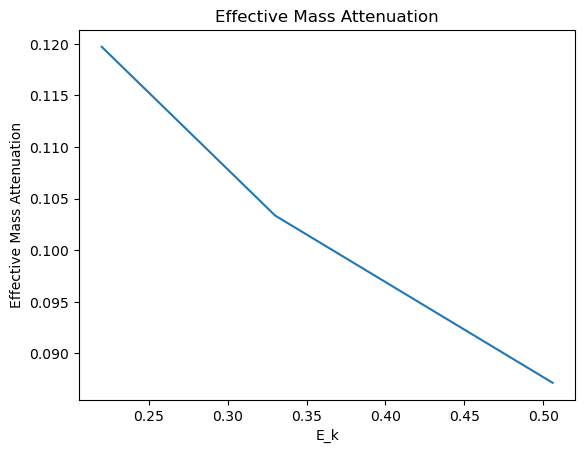

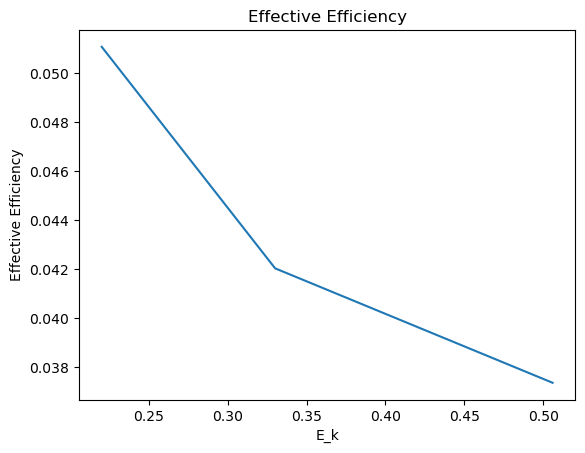

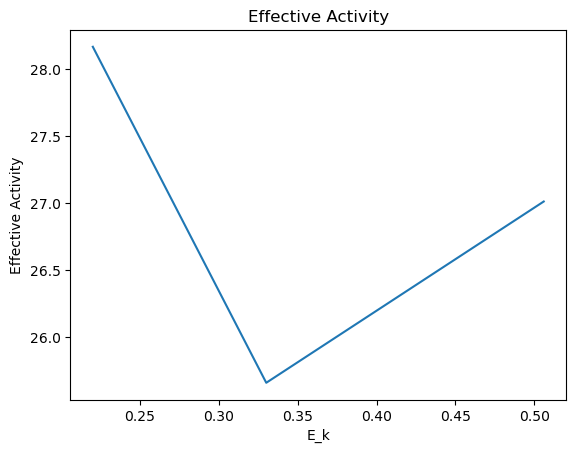

In [14]:
import matplotlib.pyplot as plt
#Effective Mass Atternuation Graph 
plt.plot(E_k, mass_attenuation_effec_min)
plt.title("Effective Mass Attenuation")
plt.xlabel("E_k")
plt.ylabel("Effective Mass Attenuation")
plt.show()

#Effective Efficiency Graph 
plt.plot(E_k, efficiency_effec_min)
plt.title("Effective Efficiency")
plt.xlabel("E_k")
plt.ylabel("Effective Efficiency")
plt.show()

#Effective Activity Graph
plt.plot(E_k, A_effec_min)
plt.title("Effective Activity")
plt.xlabel("E_k")
plt.ylabel("Effective Activity")
plt.show()